In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted
import os
import pandas as pd

import jax
from jax import random
from modax.data.kdv import doublesoliton

jax.config.update('jax_platform_name', 'cpu') # to fix weird memory bug

In [2]:
# settings
%config InlineBackend.figure_format = 'svg'
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches
plt.rcParams.update({'font.size': 8})


# Plot 4.0

In [64]:
# Loading data
df_sbl = load_tensorboard('runs_rewrite/SBL_run_1/')
df_deep = load_tensorboard('runs_rewrite/deepymod_1/')

In [60]:
# Getting sets of keys

prior_keys = natsorted(key for key in df_sbl.keys() if key.find('alpha') == 0)
coeff_keys = natsorted(key for key in df_sbl.keys() if key.find('coeffs') == 0)
masked_coeff_keys = natsorted(key for key in df_sbl.keys() if key.find('masked_coeffs') == 0)
posterior_keys = natsorted(key for key in df_sbl.keys() if key.find('bayes') == 0)

estimator_keys_deep = natsorted(key for key in df_deep.keys() if key.find('estimator') == 0)
masked_coeff_keys_deep = natsorted(key for key in df_deep.keys() if key.find('unscaled') == 0)
coeff_keys_deep = natsorted(key for key in df_deep.keys() if key.find('remaining_full') == 0)

(0.0, 5000.0)

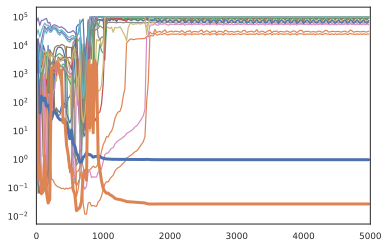

In [61]:
plt.semilogy(df_sbl[prior_keys])
plt.semilogy(df_sbl[prior_keys[3]], lw=3)
plt.semilogy(df_sbl[prior_keys[6]], lw=3)

plt.xlim([0, 5000])

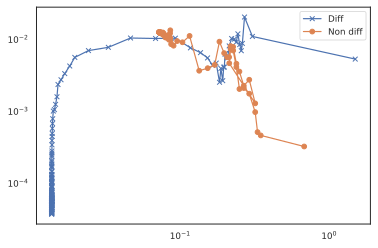

In [62]:
plt.loglog(df_sbl.mse, df_sbl.reg, 'x-', label='Diff')
plt.loglog(df_deep.loss_mse_0, df_deep.loss_reg_0, 'o-', label='Non diff')

plt.legend()

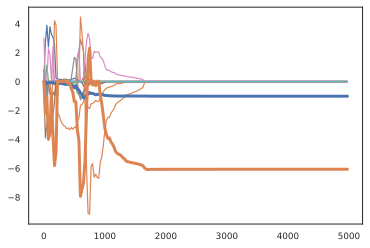

In [63]:
plt.plot(df_sbl[posterior_keys])
plt.plot(df_sbl[posterior_keys[3]], lw=3)
plt.plot(df_sbl[posterior_keys[6]], lw=3)

(-7.0, 2.0)

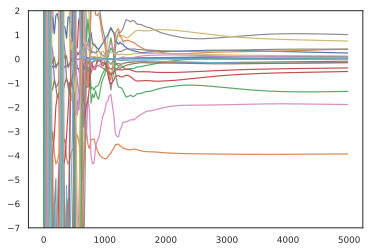

In [32]:
plt.plot(df_deep[coeff_keys_deep])
plt.ylim([-7, 2])

(-7.0, 3.0)

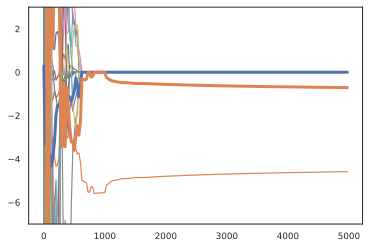

In [33]:
plt.plot(df_deep[masked_coeff_keys_deep])
plt.plot(df_deep[masked_coeff_keys_deep[3]], lw=3)
plt.plot(df_deep[masked_coeff_keys_deep[6]], lw=3)
plt.ylim([-7, 3])

(-5.0, 3.0)

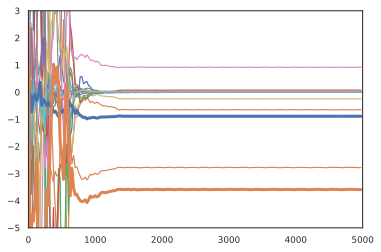

In [34]:
plt.plot(df_sbl[coeff_keys])

plt.plot(df_sbl[coeff_keys[3]], lw=3)
plt.plot(df_sbl[coeff_keys[6]], lw=3)
plt.xlim([0, 5000])
plt.ylim([-5, 3])

In [35]:
# Dataset
key = random.PRNGKey(0)
noise = 0.20

# Making data
x = np.linspace(-6, 7, 50)
t = np.linspace(0.1, 3.0, 40)
t_grid, x_grid = np.meshgrid(t, x, indexing="ij")
u = doublesoliton(x_grid, t_grid, c=[5.0, 2.0], x0=[-5.0, -0.0])
u_noisy = u + noise * np.std(u) * random.normal(key, u.shape)

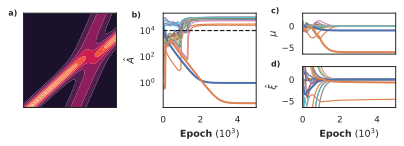

In [58]:
fig = plt.figure(constrained_layout=True, figsize=(1.0 * col_width, 0.35 * col_width))
gs = GridSpec(6, 3, figure=fig)
label_size=8

frame = 20
ax = fig.add_subplot(gs[:, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-8., 38, 'a)', fontdict={'weight':'bold', 'size': label_size})

ax = fig.add_subplot(gs[:, 1])
ax.plot(df_sbl[prior_keys].ewm(alpha=0.1).mean())
ax.plot(df_sbl[prior_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(df_sbl[prior_keys[6]].ewm(alpha=0.1).mean(), lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
ax.set_xlim([0, 5000])
ax.set_ylabel(r'$\hat{A}$')
ax.text(-1700.0, 1e5, 'b)', fontdict={'weight':'bold', 'size': label_size})
ax.set_xlabel(r'$\mathbf{Epoch}$ ($10^3$)')
ax.set_xticks([0, 2000, 4000])
ax.set_xticklabels([0, 2, 4])


ax = fig.add_subplot(gs[:3, 2])
ax.plot(df_sbl[posterior_keys].ewm(alpha=0.1).mean())
ax.plot(df_sbl[posterior_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(df_sbl[posterior_keys[6]].ewm(alpha=0.1).mean(), lw=2)
#ax.set_yscale('log')
ax.set_xlim([0, 5000])
ax.set_ylim([-6.5, 3])
ax.set_xticks([])
ax.set_ylabel(r'$\mu$')
ax.text(-1700.0, 3, 'c)', fontdict={'weight':'bold', 'size': label_size})


ax = fig.add_subplot(gs[3:, 2])
ax.plot(df_deep[masked_coeff_keys_deep].ewm(alpha=0.1).mean())
ax.plot(df_deep[masked_coeff_keys_deep[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(df_deep[masked_coeff_keys_deep[6]].ewm(alpha=0.1).mean(), lw=2)
ax.set_ylim([-6.5, 3])
ax.set_xlim([0, 5000])
ax.set_xlabel(r'$\mathbf{Epoch}$ ($10^3$)')
ax.set_xticks([0, 2000, 4000])
ax.set_xticklabels([0, 2, 4])
ax.set_ylabel(r'$\hat{\xi}$')
ax.text(-1700.0, 3, 'd)', fontdict={'weight':'bold', 'size': label_size})

plt.savefig('kdv.pdf', bbox_inches='tight', pad_inches=0)

# Plot 3.0

In [3]:
files = natsorted([file for file in os.listdir('runs') if file.find('SBL')==0])
dfs_sbl = [load_tensorboard(f'runs/{file}') for file in files]

files = natsorted([file for file in os.listdir('runs') if file.find('pinn')==0])
dfs_pinn = [load_tensorboard(f'runs/{file}') for file in files]

In [4]:
# Dataset
key = random.PRNGKey(0)
noise = 0.20

# Making data
x = np.linspace(-6, 7, 50)
t = np.linspace(0.1, 3.0, 40)
t_grid, x_grid = np.meshgrid(t, x, indexing="ij")
u = doublesoliton(x_grid, t_grid, c=[5.0, 2.0], x0=[-5.0, -0.0])
u_noisy = u + noise * np.std(u) * random.normal(key, u.shape)

In [5]:
prior_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('alpha') == 0)
coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('coeffs') == 0)
masked_coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('masked_coeffs') == 0)
bayes_coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('bayes') == 0)

In [6]:
# settings
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-paper')
col_width = 5.5 # neurips style column width in inches
plt.rcParams.update({'font.size': 7})
label_size=8

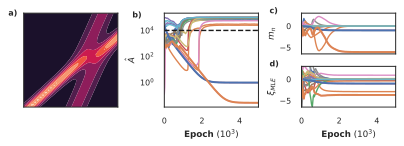

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(1.0 * col_width, 0.35 * col_width))
gs = GridSpec(6, 3, figure=fig)
run_idx = 4

frame = 20
ax = fig.add_subplot(gs[:, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-8., 38, 'a)', fontdict={'weight':'bold', 'size': label_size})

ax = fig.add_subplot(gs[:, 1])
ax.plot(dfs_sbl[run_idx][prior_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_sbl[run_idx][prior_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(dfs_sbl[run_idx][prior_keys[6]].ewm(alpha=0.1).mean(), lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
ax.set_xlim([0, 5000])
ax.set_ylabel(r'$\hat{A}$')
ax.text(-1700.0, 1e5, 'b)', fontdict={'weight':'bold', 'size': label_size})
ax.set_xlabel(r'$\mathbf{Epoch}$ ($10^3$)')
ax.set_xticks([0, 2000, 4000])
ax.set_xticklabels([0, 2, 4])

ax = fig.add_subplot(gs[:3, 2])
ax.plot(dfs_sbl[run_idx][bayes_coeff_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_sbl[run_idx][bayes_coeff_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(dfs_sbl[run_idx][bayes_coeff_keys[6]].ewm(alpha=0.1).mean(), lw=2)
#ax.set_yscale('log')
ax.set_xlim([0, 5000])
ax.set_ylim([-6.5, 3])
ax.set_xticks([])
ax.set_ylabel(r'$m_n$')
ax.text(-1700.0, 3, 'c)', fontdict={'weight':'bold', 'size': label_size})


ax = fig.add_subplot(gs[3:, 2])
ax.plot(dfs_pinn[run_idx][coeff_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_pinn[run_idx][coeff_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(dfs_pinn[run_idx][coeff_keys[6]].ewm(alpha=0.1).mean(), lw=2)
ax.set_ylim([-6.5, 3])
ax.set_xlim([0, 5000])
ax.set_xlabel(r'$\mathbf{Epoch}$ ($10^3$)')
ax.set_xticks([0, 2000, 4000])
ax.set_xticklabels([0, 2, 4])
ax.set_ylabel(r'$\xi_{MLE}$')
ax.text(-1700.0, 3, 'd)', fontdict={'weight':'bold', 'size': label_size})

plt.savefig('kdv.pdf', bbox_inches='tight', pad_inches=0)

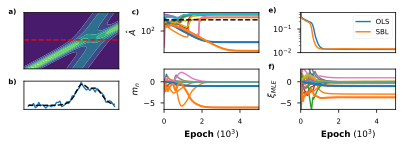

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(1.0 * col_width, 0.35 * col_width))
gs = GridSpec(6, 3, figure=fig)
run_idx = 4

frame = 20
ax = fig.add_subplot(gs[:, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.axhline(frame, linestyle='--', color='r')
ax.text(-8., 38, 'a)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[4:, 0])
ax.plot(x, u_noisy[frame, :])
ax.plot(x, u[frame, :], 'k--')
ax.set_yticks([])
ax.set_xticks([])
ax.text(-9.0, 1.8, 'b)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[:3, 1])
ax.plot(dfs_sbl[run_idx][prior_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_sbl[run_idx][prior_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(dfs_sbl[run_idx][prior_keys[6]].ewm(alpha=0.1).mean(), lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
ax.set_xticks([])
ax.set_xlim([0, 5000])
ax.set_ylabel(r'$\hat{A}$')
ax.text(-1700.0, 1e5, 'c)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[3:, 1])
ax.plot(dfs_sbl[run_idx][bayes_coeff_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_sbl[run_idx][bayes_coeff_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(dfs_sbl[run_idx][bayes_coeff_keys[6]].ewm(alpha=0.1).mean(), lw=2)
#ax.set_yscale('log')
ax.set_xlim([0, 5000])
ax.set_ylim([-6.5, 3])
ax.set_xlabel(r'$\mathbf{Epoch}$ ($10^3$)')
ax.set_xticks([0, 2000, 4000])
ax.set_xticklabels([0, 2, 4], fontdict={"size": 7})
ax.set_ylabel(r'$m_n$')
#ax.text(-1700.0, 3, 'd)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[:3, 2])
ax.plot(dfs_pinn[run_idx].mse + dfs_pinn[run_idx].reg, label='OLS')

ax.plot(dfs_sbl[run_idx].mse + dfs_sbl[run_idx].reg, label='SBL')
ax.set_yscale('log')
ax.set_xlim([0, 5000])
ax.set_xticks([])
ax.set_ylim([1e-2, 5e-1])
ax.legend(fontsize=7)
ax.text(-1700.0, 5e-1, 'e)', fontdict={'weight':'bold'})


ax = fig.add_subplot(gs[3:, 2])
ax.plot(dfs_pinn[run_idx][coeff_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_pinn[run_idx][coeff_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(dfs_pinn[run_idx][coeff_keys[6]].ewm(alpha=0.1).mean(), lw=2)
ax.set_ylim([-6.5, 3])
ax.set_xlim([0, 5000])
ax.set_xlabel(r'$\mathbf{Epoch}$ ($10^3$)')
ax.set_xticks([0, 2000, 4000])
ax.set_xticklabels([0, 2, 4], fontdict={"size": 7})
ax.set_ylabel(r'$\xi_{MLE}$')
ax.text(-1700.0, 3, 'f)', fontdict={'weight':'bold'})

plt.savefig('kdv.pdf', bbox_inches='tight', pad_inches=0)

# Plot 2.0

In [3]:
files = natsorted([file for file in os.listdir('runs') if file.find('SBL')==0])
dfs_sbl = [load_tensorboard(f'runs/{file}') for file in files]

files = natsorted([file for file in os.listdir('runs') if file.find('pinn')==0])
dfs_pinn = [load_tensorboard(f'runs/{file}') for file in files]

In [4]:
def mean_std(prop, df_list, log):
    """Returns mean and std and (mean - std, mean + std) of prop for all dataframes in df_list."""
    data = np.stack([prop(df) for df in df_list], axis=-1)
    if log:
        data = np.log10(data)
    mean = np.mean(data, axis=-1)  
    std = np.std(data, axis=-1)  
    return mean, std, (mean-std, mean + std)

In [5]:
prior_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('alpha') == 0)
coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('coeffs') == 0)
masked_coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('masked_coeffs') == 0)
bayes_coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('bayes') == 0)

In [6]:
# Dataset
key = random.PRNGKey(0)
noise = 0.20

# Making data
x = np.linspace(-6, 7, 50)
t = np.linspace(0.1, 3.0, 40)
t_grid, x_grid = np.meshgrid(t, x, indexing="ij")
u = doublesoliton(x_grid, t_grid, c=[5.0, 2.0], x0=[-5.0, -0.0])
u_noisy = u + noise * np.std(u) * random.normal(key, u.shape)

In [15]:
sbl_prior = mean_std(lambda df: df[prior_keys], dfs_sbl, log=True)
sbl_posterior = mean_std(lambda df: df[bayes_coeff_keys], dfs_sbl, log=False)
pinn_coeffs = mean_std(lambda df: df[coeff_keys], dfs_pinn, log=False)

x_vals = dfs_pinn[0].index

In [93]:
fig = plt.figure(constrained_layout=True, figsize=(0.9 * col_width, 0.3 * col_width))
gs = GridSpec(2, 3, figure=fig)
run_idx=4

frame = 20
ax = fig.add_subplot(gs[0, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Korteweg-de Vries')
ax.axhline(frame, linestyle='--', color='r')
ax.text(-11.0, 50.0, 'a)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[1, 0])
ax.plot(x, u_noisy[frame, :])
ax.plot(x, u[frame, :], 'k--')
ax.set_yticks([])
ax.text(-10.0, 2.0, 'b)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[:, 1])
plt.plot(x_vals, sbl_prior[0])
plt.plot(x_vals, sbl_prior[0][:, 3], lw=2)
plt.plot(x_vals, sbl_prior[0][:, 6], lw=2)
for idx in np.arange(sbl_prior[0].shape[-1]):
    plt.fill_between(x_vals, sbl_prior[2][0][:, idx], sbl_prior[2][1][:, idx], alpha=0.4)
#ax.set_yscale('log')
ax.axhline(4, color='k', linestyle='--')
ax.set_title('log prior precision')
ax.set_xlim([0, 1e4])
ax.set_ylim([-2, 5.2])
ax.set_xlabel('Epoch', fontdict={'weight': 'bold'})
ax.text(-3300.0, 5.85, 'c)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[0, 2])
plt.plot(x_vals, sbl_posterior[0])
plt.plot(x_vals, sbl_posterior[0][:, 3], lw=2)
plt.plot(x_vals, sbl_posterior[0][:, 6], lw=2)
for idx in np.arange(sbl_posterior[0].shape[-1]):
    plt.fill_between(x_vals, sbl_posterior[2][0][:, idx], sbl_posterior[2][1][:, idx], alpha=0.4)
ax.set_ylim([-7, 2.0])
ax.set_xticks([])
ax.set_title('posterior')
ax.set_xlim([0, 1e4])
ax.text(-3000.0, 4.0, 'd)', fontdict={'weight':'bold'})

ax = fig.add_subplot(gs[1, 2])
plt.plot(x_vals, pinn_coeffs[0])
plt.plot(x_vals, pinn_coeffs[0][:, 3], lw=2)
plt.plot(x_vals, pinn_coeffs[0][:, 6], lw=2)
for idx in np.arange(pinn_coeffs[0].shape[-1]):
    plt.fill_between(x_vals, pinn_coeffs[2][0][:, idx], pinn_coeffs[2][1][:, idx], alpha=0.4)
ax.set_ylim([-7, 2])
#ax.set_xticks([])
ax.set_title('baseline')
ax.set_xlim([0, 1e4])
ax.set_xlabel('Epoch', fontdict={'weight': 'bold'})
ax.text(-3000.0, 4, 'e)', fontdict={'weight':'bold'})
#ax.set_xticks([1e4])
#ax.set_xticklabels(['10'])
#ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])


plt.savefig('kdv.pdf', bbox_inches='tight', pad_inches=0)

# Multiple runs

In [3]:
files = natsorted([file for file in os.listdir('runs') if file.find('SBL')==0])
dfs_sbl = [load_tensorboard(f'runs/{file}') for file in files]

In [4]:
files = natsorted([file for file in os.listdir('runs') if file.find('pinn')==0])
dfs_pinn = [load_tensorboard(f'runs/{file}') for file in files]

In [5]:
def mean_std(prop, df_list, log):
    """Returns mean and std and (mean - std, mean + std) of prop for all dataframes in df_list."""
    data = np.stack([prop(df) for df in df_list], axis=-1)
    if log:
        data = np.log10(data)
    mean = np.mean(data, axis=-1)  
    std = np.std(data, axis=-1)  
    return mean, std, (mean-std, mean + std)

In [6]:
sbl_loss = mean_std(lambda df: df.mse + df.reg, dfs_sbl, log=True)
pinn_loss = mean_std(lambda df: df.mse + df.reg, dfs_pinn, log=True)
x_vals = dfs_pinn[0].index

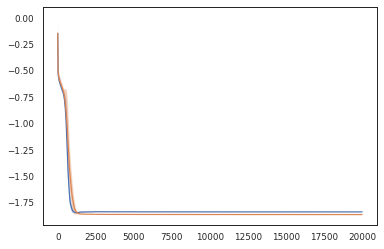

In [7]:
plt.plot(x_vals, sbl_loss[0])
plt.fill_between(x_vals, sbl_loss[2][0], sbl_loss[2][1], alpha=0.4)

plt.plot(x_vals, pinn_loss[0])
plt.fill_between(x_vals, pinn_loss[2][0], pinn_loss[2][1], alpha=0.4)

In [8]:
prior_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('alpha') == 0)
coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('coeffs') == 0)
masked_coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('masked_coeffs') == 0)
bayes_coeff_keys = natsorted(key for key in dfs_sbl[0].keys() if key.find('bayes') == 0)

In [9]:
sbl_prior = mean_std(lambda df: df[prior_keys], dfs_sbl, log=True)

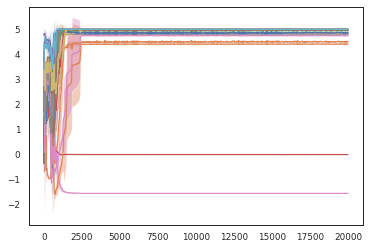

In [10]:
plt.plot(x_vals, sbl_prior[0])
for idx in np.arange(sbl_prior[0].shape[-1]):
    plt.fill_between(x_vals, sbl_prior[2][0][:, idx], sbl_prior[2][1][:, idx], alpha=0.4)

In [18]:
sbl_coeffs = mean_std(lambda df: df[bayes_coeff_keys], dfs_sbl, log=False)
pinn_coeffs = mean_std(lambda df: df[coeff_keys], dfs_pinn, log=False)

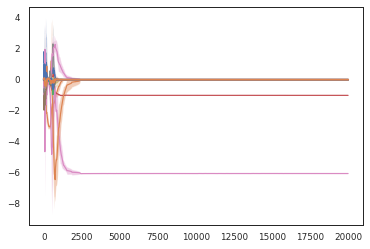

In [20]:
plt.plot(x_vals, sbl_coeffs[0])
plt.plot(x_vals, sbl_coeffs[0][:, 2], linewidth=2)
plt.plot(x_vals, sbl_coeffs[0][:, 5], linewidth=2)
for idx in np.arange(sbl_coeffs[0].shape[-1]):
    plt.fill_between(x_vals, sbl_coeffs[2][0][:, idx], sbl_coeffs[2][1][:, idx], alpha=0.4)
    
#plt.ylim([-1.5, 1.5])

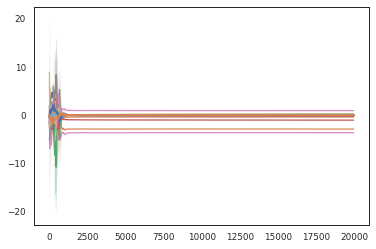

In [14]:
plt.plot(x_vals, pinn_coeffs[0])
plt.plot(x_vals, pinn_coeffs[0][:, 2], linewidth=2)
plt.plot(x_vals, pinn_coeffs[0][:, 5], linewidth=2)
for idx in np.arange(pinn_coeffs[0].shape[-1]):
    plt.fill_between(x_vals, pinn_coeffs[2][0][:, idx], pinn_coeffs[2][1][:, idx], alpha=0.4)
    
#plt.ylim([-1.2, 1])

NameError: name 'x_vals' is not defined

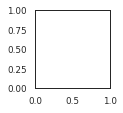

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(0.5 * col_width, 0.7 * col_width))
gs = GridSpec(3, 2, figure=fig)

#Upper left
ax = fig.add_subplot(gs[0, 0])
ax.plot(x_vals, pinn_loss[0], label='PINN')
ax.fill_between(x_vals, pinn_loss[2][0], pinn_loss[2][1], alpha=0.4)

ax.plot(x_vals, sbl_loss[0], label='SBL')
ax.fill_between(x_vals, sbl_loss[2][0], sbl_loss[2][1], alpha=0.4)

#ax.set_ylim([-3.4, -2])
ax.set_title('Loss')
ax.legend()
ax.text(-7000.0, -0.5, 'a', fontdict={'weight':'bold', 'size': 12})
   
    

#Lower left
ax = fig.add_subplot(gs[0, 1])
ax.plot(x_vals, sbl_prior[0])
for idx in np.arange(sbl_prior[0].shape[-1]):
    plt.fill_between(x_vals, sbl_prior[2][0][:, idx], sbl_prior[2][1][:, idx], alpha=0.4)
ax.plot(x_vals, sbl_prior[0][:, 2], linewidth=2)
ax.plot(x_vals, sbl_prior[0][:, 2], linewidth=2)
ax.set_ylim([-0.5, 5.5])
ax.set_title("Prior")
ax.plot(x_vals, sbl_prior[0])
ax.text(-5100.0, 5.3, 'b', fontdict={'weight':'bold', 'size': 12})
   
    
# middle
ax = fig.add_subplot(gs[1, :])
ax.plot(x_vals, pinn_coeffs[0])
ax.plot(x_vals, pinn_coeffs[0][:, 2], linewidth=2)
ax.plot(x_vals, pinn_coeffs[0][:, 5], linewidth=2)
for idx in np.arange(pinn_coeffs[0].shape[-1]):
    ax.fill_between(x_vals, pinn_coeffs[2][0][:, idx], pinn_coeffs[2][1][:, idx], alpha=0.4)
ax.set_xticks([])
ax.set_ylim([-1.2, 0.3])
ax.set_title("Coefficients PINN")
ax.text(-3000.0, 0.25, 'c', fontdict={'weight':'bold', 'size': 12})
    
# right
ax = fig.add_subplot(gs[2, :])
ax.plot(x_vals, sbl_coeffs[0])
ax.plot(x_vals, sbl_coeffs[0][:, 2], linewidth=2)
ax.plot(x_vals, sbl_coeffs[0][:, 5], linewidth=2)
for idx in np.arange(sbl_coeffs[0].shape[-1]):
    ax.fill_between(x_vals, sbl_coeffs[2][0][:, idx], sbl_coeffs[2][1][:, idx], alpha=0.4)
ax.set_xlabel('Epoch', fontdict={'weight':'bold'})
ax.set_ylim([-1.2, 0.3])
ax.set_xticks([0, 5000, 10000])
ax.set_title("Coefficients SBL")
ax.text(-3000.0, 0.25, 'd', fontdict={'weight':'bold', 'size': 12})
plt.savefig('SBL.pdf', bbox_inches='tight')

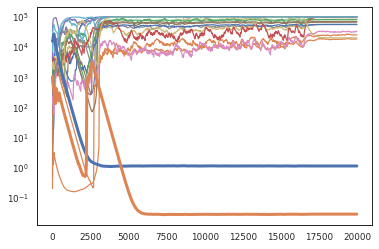

In [33]:
run_idx=4
plt.semilogy(dfs_sbl[run_idx][prior_keys].ewm(alpha=0.1).mean())
plt.semilogy(dfs_sbl[run_idx][prior_keys[3]].ewm(alpha=0.1).mean(), lw=3)
plt.semilogy(dfs_sbl[run_idx][prior_keys[6]].ewm(alpha=0.1).mean(), lw=3)

(-10.0, 0.5)

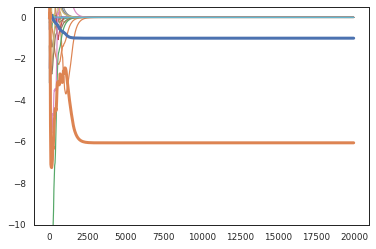

In [21]:
run_idx=1
plt.plot(dfs_sbl[run_idx][masked_coeff_keys].ewm(alpha=0.1).mean())
plt.plot(dfs_sbl[run_idx][masked_coeff_keys[3]].ewm(alpha=0.1).mean(), lw=3)
plt.plot(dfs_sbl[run_idx][masked_coeff_keys[6]].ewm(alpha=0.1).mean(), lw=3)
plt.ylim([-10, 0.5])

(-7.0, 0.5)

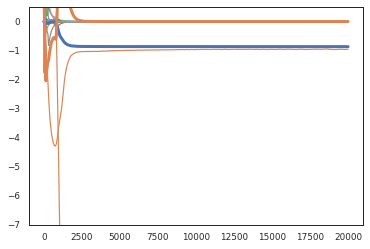

In [67]:
run_idx=1
plt.plot(dfs_sbl[run_idx][bayes_coeff_keys].ewm(alpha=0.1).mean())
plt.plot(dfs_sbl[run_idx][bayes_coeff_keys[3]].ewm(alpha=0.1).mean(), lw=3)
plt.plot(dfs_sbl[run_idx][bayes_coeff_keys[6]].ewm(alpha=0.1).mean(), lw=3)
plt.ylim([-7, 0.5])

(-7.0, 0.5)

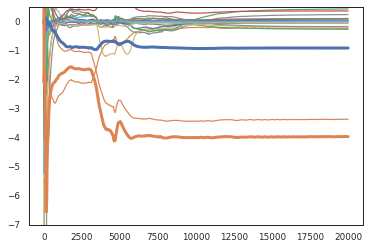

In [68]:
run_idx=1
plt.plot(dfs_pinn[run_idx][coeff_keys].ewm(alpha=0.1).mean())
plt.plot(dfs_pinn[run_idx][coeff_keys[3]].ewm(alpha=0.1).mean(), lw=3)
plt.plot(dfs_pinn[run_idx][coeff_keys[6]].ewm(alpha=0.1).mean(), lw=3)
plt.ylim([-7, 0.5])

In [1]:
from jax import random
from modax.data.kdv import doublesoliton
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
key = random.PRNGKey(0)
noise = 0.20

# Making data
x = np.linspace(-10, 10, 100)
t = np.linspace(0.1, 1.0, 20)
t_grid, x_grid = np.meshgrid(t, x, indexing="ij")
u = doublesoliton(x_grid, t_grid, c=[5.0, 2.0], x0=[0.0, -5.0])
u_noisy = u + noise * np.std(u) * random.normal(key, u.shape)

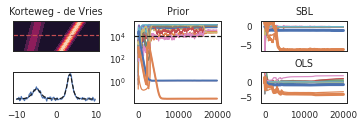

In [26]:
fig = plt.figure(constrained_layout=True, figsize=(0.9 * col_width, 0.3 * col_width))
gs = GridSpec(2, 3, figure=fig)
run_idx=4

frame = 10
ax = fig.add_subplot(gs[0, 0])
ax.contourf(u)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Korteweg - de Vries')
ax.axhline(frame, linestyle='--', color='r')

ax = fig.add_subplot(gs[1, 0])
ax.plot(x, u_noisy[frame, :])
ax.plot(x, u[frame, :], 'k--')
ax.set_yticks([])

ax = fig.add_subplot(gs[:, 1])
ax.plot(dfs_sbl[run_idx][prior_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_sbl[run_idx][prior_keys[3]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(dfs_sbl[run_idx][prior_keys[6]].ewm(alpha=0.1).mean(), lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
ax.set_title('Prior')

ax = fig.add_subplot(gs[0, 2])
ax.plot(dfs_sbl[run_idx][masked_coeff_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_sbl[run_idx][masked_coeff_keys[3]].ewm(alpha=0.1).mean(), lw=3)
ax.plot(dfs_sbl[run_idx][masked_coeff_keys[6]].ewm(alpha=0.1).mean(), lw=3)
ax.set_ylim([-6.5, 1.5])
ax.set_xticks([])
ax.set_title('SBL')

ax = fig.add_subplot(gs[1, 2])
ax.plot(dfs_pinn[run_idx][coeff_keys].ewm(alpha=0.1).mean())
ax.plot(dfs_pinn[run_idx][coeff_keys[3]].ewm(alpha=0.1).mean(), lw=3)
ax.plot(dfs_pinn[run_idx][coeff_keys[6]].ewm(alpha=0.1).mean(), lw=3)
ax.set_ylim([-6.5, 3])
ax.set_title('OLS')

plt.savefig('kdv.pdf', bbox_inches='tight', pad_inches=0)

In [42]:


key = random.PRNGKey(0)
noise = 0.20

# Making data
x = np.linspace(-6, 7, 50)
t = np.linspace(0.1, 3.0, 40)
t_grid, x_grid = np.meshgrid(t, x, indexing="ij")
u = doublesoliton(x_grid, t_grid, c=[5.0, 2.0], x0=[-5.0, -0.0])

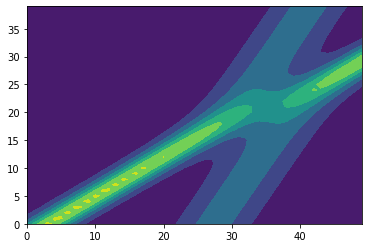

In [43]:
plt.contourf(u)

In [34]:
u.shape

(30, 50)

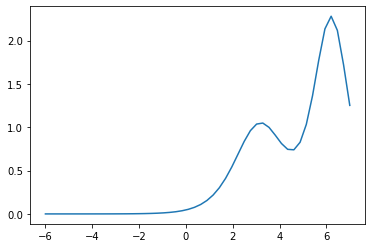

In [41]:
frame = -10
plt.plot(x, u[frame, :])
#plt.plot(x, u_noisy[frame, :])

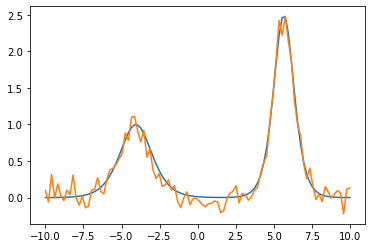

In [9]:
frame = -1
plt.plot(x, u[frame, :])
plt.plot(x, u_noisy[frame, :])

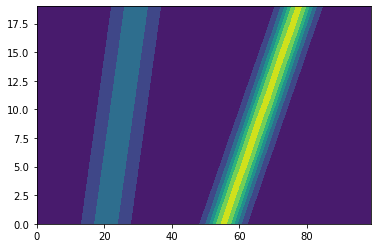